{'1': 9.0, '2': 18.0, '': 0.0, '3': 22.0, '4': 35.0, '5': 150.0, '8': 35.0, '10': 35.0, '20': 35.0, '6': 28.0, '25': 170.0, '7': 521.0, '23': 219.0, '26': 254.0, '27': 327.0, '12': 468.0}
{'Hadern': 18.09, 'Berg am Laim': 25.66, 'Maxvorstadt': 36.94, 'Pasing-Obermenzing': 24.31, 'Sendling-Westpark': 20.97, 'Au-Haidhausen': 24.4, 'Laim': 13.3, 'Milbertshofen-Am Hart': 21.63, 'Tudering-Riem': 27.8, 'Schwabing-West': 15.87, 'Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln': 20.21, 'Allach-Untermenzing': 18.96, 'Ludwigsvorstadt-Isarvorstadt': 32.4, 'Schwanthalerhöhe': 29.76, 'Ramersdorf-Perlach': 34.08, 'Obergiesing': 18.31, 'Schwabing-Freimann': 18.89, 'Neuhausen-Nymphenburg': 19.89, 'Moosach': 10.13, 'Bogenhausen': 32.38, 'Sendling': 19.74, 'Untergiesing-Harlaching': 22.4, 'Altstadt-Lehel': 22.86, 'Feldmoching-Hasenbergl': 28.76, 'Aubing-Lochhausen-Langwied': 19.78}
{'Hadern': {'Entire home/apt': 21, 'Private room': 26}, 'Berg am Laim': {'Entire home/apt': 48, 'Private room': 40},

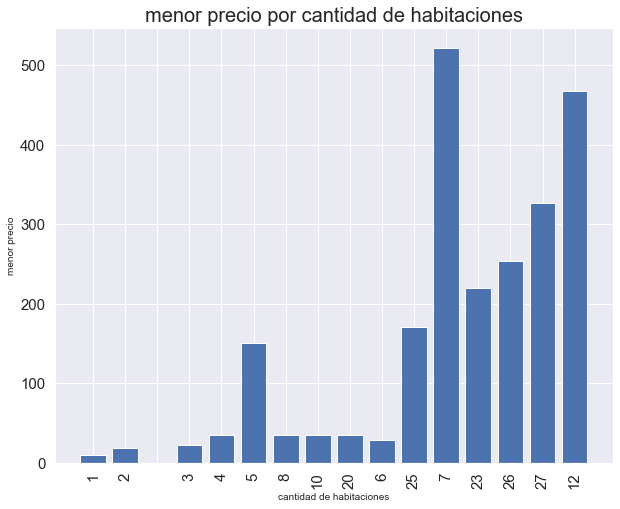

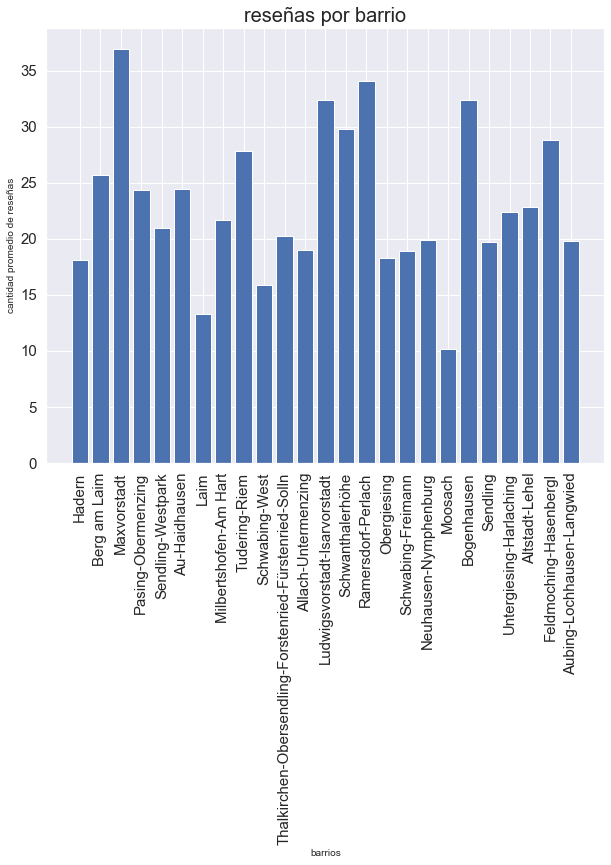

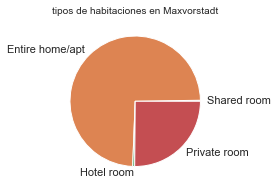

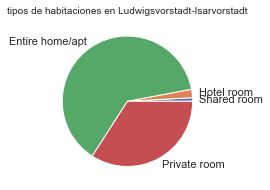

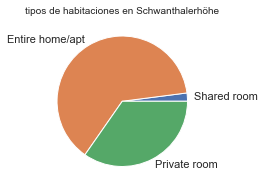

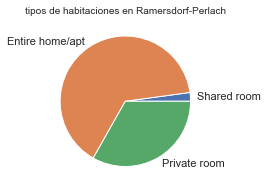

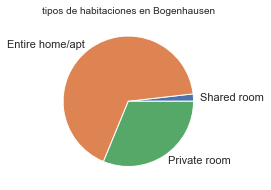

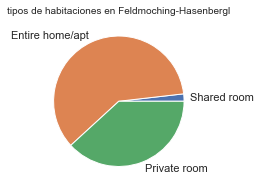

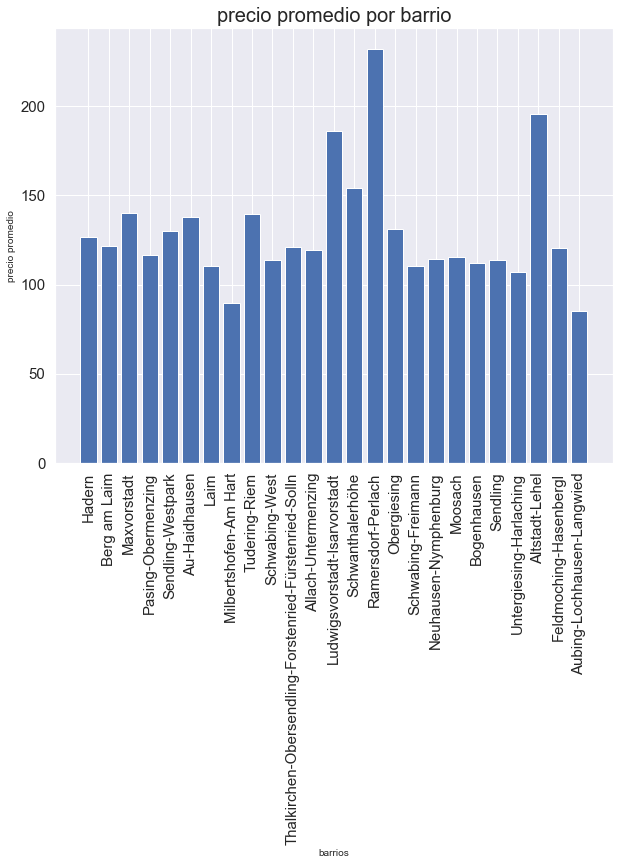

In [1]:
# Importacion de modulos utilizados
import csv
# importación de los modulos de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

CONFIG={
    "path": "./listings.csv"
}

# aplicamos la utilidad de seaborn
sns.set()

def create_bar(dictio, xlabel=None, ylabel=None, title=None):
    # Crea un grafico de barras

    plt.figure(figsize=(10, 8))
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.title(title, fontsize=20)
    plt.bar(dictio.keys(), dictio.values())

def create_pie(clave, dictio, name=None):
    # crea un grafico de torta
    plt.figure(figsize=(3, 3))
    plt.title(name, fontsize=10)
    plt.pie(dictio.values(), labels=dictio.keys())

def string_to_float(value):
      ''' Limpia el formato de un numero de una celda
          en formato string, convirtiendolo a flotante '''   
      return float( value.replace('$', '').replace(',', '') )

def avarage(l, n_decimal=2 ):
    ''' Calcula el promedio de una lista '''
    return round(sum(l) / len(l), n_decimal)

def min_value(l):
    ''' Obtiene el menor valor de una lista '''
    return min(l)

def count(l):
    ''' toma una lista, y retorna un diccionario
        que asocia a cada elemento de la lista
        el numero de veces que este aparece en la lista 
    '''
    return dict((i, l.count(i)) for i in set(l))

def create_dict(as_key, as_value, converter=None, foo=None):
    ''' Toma un diccionario vacio, y dos tuplas (el primer elemento
        es el nombre de la columna, el segundo el numero de la misma):
          - independent: Son los datos que formaran las claves del diccionario
          - dependt: Son los datos que se almacenan en listas asociadas a cada clave '''

    with open(CONFIG["path"], newline='') as f:

        d = {}
        reader = csv.DictReader(f, delimiter=',')
        
        for row in reader:
            key = row[ as_key ]
            element = converter(row[as_value]) if converter else row[as_value]
            
            if  key not in d.keys():
                d[ key ] = []
            
            d[ key ].append( element )
        
        # Si se definio una funcion como parametro para aplicar y sobrescribir los elementos filtrados se aplica
        if foo :
            for k,v in d.items():
                d[k] = foo( v )

        return d

menor_precio_por_cantidad_habitaciones = create_dict( "bedrooms", "price", converter=string_to_float, foo=min_value)
cantidad_reseñas_por_barrio =create_dict("neighbourhood_cleansed", "number_of_reviews", converter=string_to_float, foo=avarage)
cantidad_tipo_habitacion_por_barrio = create_dict("neighbourhood_cleansed", "room_type", foo=count)
precio_promedio_por_barrio = create_dict("neighbourhood_cleansed", "price", converter=string_to_float, foo=avarage )

# Descomentar una linea a vez para visualizar el diccionario en formato mas legible
#   (Se deben correr las celdas anteriores cada vez que quiera imprimir)

create_bar(menor_precio_por_cantidad_habitaciones, 'cantidad de habitaciones', 'menor precio', 'menor precio por cantidad de habitaciones')
create_bar(cantidad_reseñas_por_barrio, 'barrios', 'cantidad promedio de reseñas', 'reseñas por barrio')
for barrio, dictio in cantidad_tipo_habitacion_por_barrio.items():
    if barrio in ['Bogenhausen', 'Maxvorstadt', 'Ramersdorf-Perlach', 'Schwanthalerhöhe', 'Ludwigsvorstadt-Isarvorstadt', 'Feldmoching-Hasenbergl']:
      create_pie(barrio, dictio, "tipos de habitaciones en {0}".format(barrio))
create_bar(precio_promedio_por_barrio, 'barrios', 'precio promedio', 'precio promedio por barrio')
